In [3]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

#                                               Lab 1 - Weightage - 3%

##  Decision Trees and Random Forests



### Dataset used : Amazon Fine food reviews.
### Maximum points in lab : 75 pts.
#### Important points to remember :
 1. Observations for the experiments done should be explained.
 2. All the code should be submitted in form of single Jupyter notebook itself.
 3. Points for each sub-section are mentioned in appropriate question.
 4. Make sure to begin early since few experiments may consume more time to run.
 5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
 6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
 7. __The lab is due on Feb 7th 11.59pm.__
 8. __The lab should be completed individually. Students are expected to follow the honor code of the class.__

### 1. Go through [scikit learn DecisionTree documentation] : https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
### Explain briefly various options available in corresponding DecisionTree classifier in scikit-learn package. [5 pts]




**bold text**# Add your description of the function here.
1. criterion - it is used to describe the paramter on basis of which the attributes are tested at each node 
criterion = entropy or ginni basis to decide split

max_depth -  The maximum depth of the tree. if none then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

min_samples_split = minimum samples required at each node for splitting to occur

min_samples_leaf = minimum number of samples required to be at a leaf node

max_features = number of features to consider when looking for the best split

max_leaf_node = Grow  tree with max_leaf_nodes in best-first fashion




The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5 
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

Out of above attributes we will consider <strong>Score as Y or Output variable</strong>, and  <strong>Summary as X or data points.</strong>



### Import Libraries

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn import model_selection
import pickle
import sqlite3
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

### 2.  Dataset loading, train test split, print two data points after converting score column into positive, negative class - [5 pts]
#### steps :
 Use score column as the output variable and Summary as the input variable
 1. Convert score column as score > 3 - positive class and score <=3 as negative class.
 2. Now define train test split as 0.25.

In [5]:
# connecting to the dataset server to download the amazon fine foods dataset. Do not make any changes to the code below
con = sqlite3.connect('database.sqlite')
messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
""", con)

# the parition function applied threshold on the rating to label a review as 'positive' or 'negative'.
def partition(x):
  if x > 3:
    return 1    
  return 0  


   # insert your code here

Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']

# call the function to create the train and test splits according to the ratio 75:25
# uncomment and complete the line below

train_X, test_X, train_y, test_y = train_test_split(Summary, Score , test_size=0.25)

# print an example of the dataset after the labeling process
print(messages.head(2))
tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(2))

   Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised
   Score                Summary
0      1  Good Quality Dog Food
1      0      Not as Advertised


In [6]:
# do not change make any changes to the code below. This part of the
# code removes stop words and transforms all the words and letters
# into a uniform representation. Further, it also removes punctuation
# marks.
nltk.download('punkt')
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

corpus = []
count_train_x=0
for text in train_X:
    count_train_x=count_train_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_test_x=0
test_set=[]
for text in test_X:
    count_test_x=count_test_x+1
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
X_test_counts = count_vect.transform(test_set)

[nltk_data] Downloading package punkt to C:\Users\DELL-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 4. Print before and after using data pre-processing for five data points - [5 pts]
For example, following are some outputs that we were able to generate

 ID | Before preprocessing | After preprocessing 
 -|-|-
 45612 | Good Strong Flavor|good strong flavor 
 180139 | GREAT SIDE DISH | great side dish 
 541273 | Its agar | it agar 
 102774 | Great product! | great product
 447382 | Love them | love them 

In [7]:
# Data before the processing step is stored in the variable train_X 
# and the processed data is present in corpus. Print randomly 5 
# instances to check the success of the processing step. 
# insert your code here
print(train_X.head(5))
print(corpus[:5])

274056       Healthy and Tasty Cereal
474763                        Not Bad
260573                   Superb snack
208785    Beginner's Lapsang Souchong
257275        Dove clean in a bottle!
Name: Summary, dtype: object
['healthi and tasti cereal', 'not bad', 'superb snack', 'beginn s lapsang souchong', 'dove clean in a bottl']


### 5. Build a basic decision tree choosing appropriate min_samples_leaf parameter so that tree fits in output cell using Graphviz package [5 pts]
Use the decision tree classifier from the sklearn library to learn a decision tree from the training dataet. For now, we would like to only visualize the tree to ensure that we are calling the correct function. Set the min_samples_leaf parameter to a high value (>15000) for learning the tree. This tree will not be accurate, but will be big enough for us to visualize it. Identify the functions in the tree package that will help to visualize the tree and plot it. Below is a sample tree generated when mi_samples_leaf was set to 20000
![tree.png](attachment:tree.png)

[Text(260.40000000000003, 201.90857142857143, 'X[13818] <= 0.5\ngini = 0.343\nsamples = 426340\nvalue = [93630, 332710]'),
 Text(223.20000000000002, 170.84571428571428, 'X[8862] <= 0.5\ngini = 0.308\nsamples = 401673\nvalue = [76333, 325340]'),
 Text(186.0, 139.78285714285715, 'X[2252] <= 0.5\ngini = 0.333\nsamples = 351282\nvalue = [74123, 277159]'),
 Text(148.8, 108.72, 'X[11874] <= 0.5\ngini = 0.349\nsamples = 327601\nvalue = [73840, 253761]'),
 Text(111.60000000000001, 77.65714285714284, 'X[8647] <= 0.5\ngini = 0.367\nsamples = 301116\nvalue = [72824, 228292]'),
 Text(74.4, 46.59428571428572, 'X[19998] <= 0.5\ngini = 0.381\nsamples = 268397\nvalue = [68855, 199542]'),
 Text(37.2, 15.531428571428563, 'gini = 0.379\nsamples = 250288\nvalue = [63641, 186647]'),
 Text(111.60000000000001, 15.531428571428563, 'gini = 0.41\nsamples = 18109\nvalue = [5214, 12895]'),
 Text(148.8, 46.59428571428572, 'gini = 0.213\nsamples = 32719\nvalue = [3969, 28750]'),
 Text(186.0, 77.65714285714284, 'gin

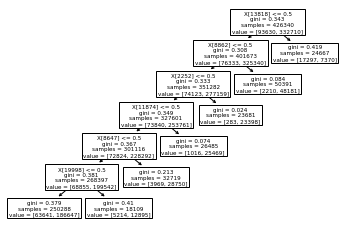

In [8]:
from sklearn import tree
# insert your code here
classifier = tree.DecisionTreeClassifier(min_samples_leaf = 18000 )
clasifier = classifier.fit(X_train_counts, train_y)
tree.plot_tree(classifier)

### 6. Experiments with different tree parameters
#### a. minimum number of samples in a node.  [5 pts]
By now we should have all the code in place for learning accurate decision trees. As we discussed in the class, one method to prevent overfitting a decision tree is to put constraints on the number of samples assigned to a split node during training. We had used this parameter to learn extremely short decision trees in the previous step. Let us now vary this parameter and investigate the impact on the train and test accuracy of the model. 
The first part of the code should loop around different values for min_samples_split and save the resulting train and test accuracy. In the second part, plot a graph with x-axis being the number of samples in the node and accuracy being the y axis. Plot both the train and test accuracies in the same figure. Write a generic function for the plotting as we will use it later for other visualizations.

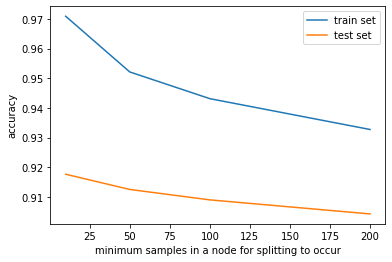

In [12]:
test_accuracy_list=[]
train_accuracy_list=[]
min_samples_split = [10,50,100,200]

for i in min_samples_split:
    # insert your code here
    classifier = tree.DecisionTreeClassifier(min_samples_split = i)
    
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy)  
    
    

    
def plot_accuracy(test_accuracy_list,train_accuracy_list, xlabel, ylabel, title):    
    # insert your code here
    plt.plot(min_samples_split, train_accuracy_list, label = 'train set' )
    plt.plot(min_samples_split, test_accuracy_list, label = 'test set' )
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
plot_accuracy(test_accuracy_list, train_accuracy_list, 'minimum samples in a node for splitting to occur', 'accuracy' , 'accuracy vs min_samples_split plot')

firstly we observe that as the minimum no. of samples required at a node for splitting to occur is increasing the accuracy is decreasing which is expected especially the rate of decrease is greater for train set accuracy as if we talk about the training set, maximum accuracy will be when there is as many number of leaf nodes as the training instances i.e. 0 entropy or perfect purity that is if each leaf contain as less samples as possible ( in best case just one sample). As is evident when minimum samples are less than 25 accuracy is greater than 97 percent for training set and close to 92 percent for test set and also the difference between train and test accuracy is more than 5 percent. And as the min numbers of samples for split doubles to 50 the difference between them becomes less than 3 percent. As very less number of samples required to split at a node results in overfitting the training set. And as the number of samples increases the rate of dip in test set accuracy becomes less as model starts to generalize better as expected. But neverthless the accuracy always remains above 90 percent implying decision tree is a good model for dicrete functions or classification.

#### b. maximum number of leaf nodes in the tree [5 pts]
The tree learner has a parameter max_leaf_nodes. Discuss the role of this parameter during the tree learning. Investigate the impact of this parameter on the train and test accuracy.

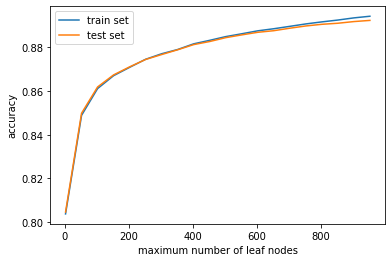

In [14]:
test_accuracy_list=[]
train_accuracy_list=[]
max_leaf_nodes=1000
step_size_2=50
steps = []
for i in range(2, max_leaf_nodes,step_size_2):   
    # insert your code here
    steps.append(i)
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes = i)
    
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy)  

def plot_accuracy2(test_accuracy_list,train_accuracy_list, xlabel, ylabel, title):    
    
    plt.plot(steps, train_accuracy_list, label = 'train set' )
    plt.plot(steps, test_accuracy_list, label = 'test set' )
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
plot_accuracy2(test_accuracy_list, train_accuracy_list, 'maximum number of leaf nodes' , 'accuracy', 'accuracy vs max no of leaf nodes')

    We observe that accuracy sharply increases initially especially till max no of leaf nodes=100 and jumps from about 80 percent to 86 in this short span which is exactly as expected as here we are tokenizing the summary into a sparse matrix based on the words in each of summary in each review. So, there will be multiple ' if this then put in this class' rules in the desired descion tree. for eg a review will be considered good in nummerous ways like 'awesome food', 'delicious', 'will surely visit again' and so on. So, we must allow a good enough number of maximum leaves for better accuracy. Interesting observation is upto a huge range there is a close overlap between test and train accuracy but then after about 700 max leaves the test accuracy starts to decreases and which will futher greatly decrease if we allow max leaf to be more which means tree starts to overfit the training set as expected. But overall we observe that accuracy is range of 80-90 one plausile reason could be that in simple classification of words by tokenization the 'context' is not preserved, thus application of NLP coulde have resulted in improvement in accuracy.   

####  % c. splitting criteria [5 pts]
Identify the default splitting critera and experiment with other criterion implemented in the tree package. Report the accuracy on the test dataset as well as other parameters chracterizing the learned decision tree. 

In [18]:
import time
classifier = tree.DecisionTreeClassifier()

tick = time.time()
classifier = classifier.fit(X_train_counts,train_y)
tock = time.time()
print("\n time taken to train the model with gini as splitting criterion is %s sec",  str(tock-tick))

tick = time.time()
predictTestY = classifier.predict(X_test_counts)
tock = time.time()

test_accuracy = accuracy_score(test_y, predictTestY)

print("\n time taken to predict test dataset labels using tree learned with gini as splitting criterion is %s sec", str(tock-tick))
print("\n accuracy on test data set with gini as splitting criterion is %f", test_accuracy)




classifier = tree.DecisionTreeClassifier(criterion = "entropy")

tick = time.time()
classifier = classifier.fit(X_train_counts,train_y)
tock = time.time()
print("\n time taken to train the model with entropy as splitting criterion is %s sec", str(tock-tick))


tick = time.time()
predictTestY = classifier.predict(X_test_counts)
tock = time.time()
    
test_accuracy = accuracy_score(test_y, predictTestY)


print("\n time taken to predict test dataset labels using tree learned with entropy as splitting criterion is %s sec",str(tock-tick))
print("\n accuracy on test data set with entropy as splitting criterion is %f", test_accuracy)



    




 time taken to train the model with gini as splitting criterion is %s sec 458.75980257987976

 time taken to predict test dataset labels using tree learned with gini as splitting criterion is %s sec 0.5769548416137695

 accuracy on test data set with gini as splitting criterion is %f 0.9153144658513588

 time taken to train the model with entropy as splitting criterion is %s sec 368.14267349243164

 time taken to predict test dataset labels using tree learned with entropy as splitting criterion is %s sec 0.43998098373413086

 accuracy on test data set with entropy as splitting criterion is %f 0.916257370843126


We see that gini and entropy are preety much the same .
Gini:Gini(E)=1−∑sqr(p) 
Entropy:H(E)=−∑plogp
hence they give almost similar accuracy.its just that they were developed in two different field of research hence two terms as per my reseach. Also, as per Tan et. al book Introduction to Data Mining

"Impurity measure are quite consistent with each other.Indeed, the strategy used to prune the tree has a greater impact on the final tree than the choice of impurity measure." 
Also as per stack overflow ginni is more suited for continous attributes while entropy for dicrete ones and by tokenizing our attributes are also discrete. So, may be thats why time taken to train is less for entropy but anyways it depends on startegy used to prune the tree which may be faster for entropy as a measure.


#### d. depth of the decision tree [5 pts]
Investigate the impact of depth of the decision tree on the test accuracy

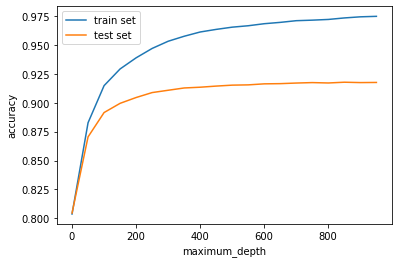

In [20]:
test_accuracy_list=[]
train_accuracy_list=[]
maximum_depth=1000
step_size=50
steps=[]
for i in range(1, maximum_depth,step_size):
    #insert your code here
    steps.append(i)
    classifier = tree.DecisionTreeClassifier(max_depth = i)
    
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy)  

    

plot_accuracy2(test_accuracy_list, train_accuracy_list, 'maximum_depth', 'accuracy', 'accuracy vs maximum depth ')

firstly the accuracy increases on both train and test set as depth of tree increases as expected as greater depth means more number of rules/decisons taken into consideration while classifying which will result in obviously more accurate predictions and hence accuarcy increases. 

 Secondly, with increasing depth its clearly visible that test set accuracy starts to dip as compared to train set on which it contiues to increase from 80 percent to as higher as 97.5 as a tree trained on training set with greater depth on trng set will start to overfit it. These trends are a classic example of overfitting.

### 7. Random forest
Now, let us explore an ensemble of decision trees - random forest. Fortunately, sklearn has an ensemble library containing the random forest classifier. Let us learn a random forest using both instance and feature bagging independently.
#### a. briefly describe the input parameters to the random forest classifier [5 pts]
insert your description here
#### b. instance bagging [10 pts]
As discussed in the class, instances are sampled with replacement to create multiple synthetic training sets. Decision tree is learned for every training set. An ensemble strategy (majority voting) is applied on the output of all the trees for a test instance. Let us vary the number of instances in each bag to learn the random forest and check if there is impact on the performance of the ensemble. 

n_estimators = no of trees in ensemble

criterion = entropy or ginni basis to decide split

random_state = sets a seed to the random generator, so that train-test splits are always deterministic and  are reproducible. most common seed values are 0 or 42.

n_jobs = number of jobs to run in parallel. default is None means 1. -1 means using all processors

max_features = maximum number of features picked to train each of the tree in forest in feature bagging


max_samples = maximum number of instances picked to train each of the tree in forest in instance bagging

bootstrap = whether bootstrap samples are used when building trees. If false the whole datset is used to build each tree



In [32]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import random
test_accuracy_list=[]
train_accuracy_list=[]
number_of_instances = [1000,5000,10000,20000]
steps = number_of_instances
for i in number_of_instances:
    classifier = RandomForestClassifier(n_jobs = -1 , random_state = random.seed(0), max_samples = i) 
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy)  

plot_accuracy2(test_accuracy_list, train_accuracy_list, 'number of instances taken to train each of the decision tree', 'accuracy', 'accuracy vs no of instances per decision tree')

TypeError: __init__() got an unexpected keyword argument 'max_samples'

NOTE- the max samples option is there in only sklearn version 22.0. I updated it but still this feature is not working here. I ran the same code on another laptop and got the result. so just presenting the observation and attaching the plot separately. I think observations are the key as plots will be same for everyone. Code I have written above.

we observe that initiialy test and train accuracy are quite close and even after an avove 10 times increases in no of features to 20k the difference is just about 91-90= 1 percent showing though slight overfit occcurs but its very small.thus vairiance has been mainatined very low till end as expected. 
The accuracy is increasing as we take more instances to train each tree in the forest as it results in more well defined 'if else' rules for the tree but at the same time slightly overfits the training  set as expected.






#### c. feature bagging [10 pts]
For performing feature bagging, we sample a subset of features from the initial set of features. A decision tree is learned for every training set that contains all the instances characterized by a subset of features. An ensemble strategy is applied for classifying a test instance. In this experiment we will investigate the impact of varying the number of features bagged on the test accuracy.

C:\Users\DELL-PC\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\DELL-PC\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\DELL-PC\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
C:\Users\DELL-PC\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


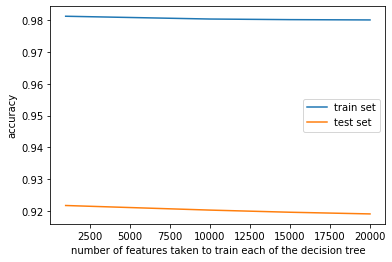

In [30]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_features = [1000,10000,15000,20000]
steps = number_of_features
for i in number_of_features:
    # insert your code here
    classifier = RandomForestClassifier(n_jobs = -1 , random_state = random.seed(0), max_features = i) 
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy) 
    

    
plot_accuracy2(test_accuracy_list ,train_accuracy_list, 'number of features taken to train each of the decision tree','accuracy', 'accuracy vs no of features per decision tree')

We observe the accuracy is almost constant which is expected as due to default true value of boostrap there is sampling with replacement of the features and the final prediction is the average of all the learned trees which results in minimum variance. Also the difference between test and train accuracy has not increased much which shows that random forest's feature bagging minimizes overfitting even better than  instance bagging as it additionally decorrelates the trees learned. also accuracy are above 90 percent  which shows that random forest are very good for classification task.

#### d. number of trees in the forest [10 pts]
Finally let us vary the number of trees in the random forest. We will use the default random forest classifier and only vary the number of trees learned in the ensemble. Again make your observations on the test accuracy as the number of trees are varied.

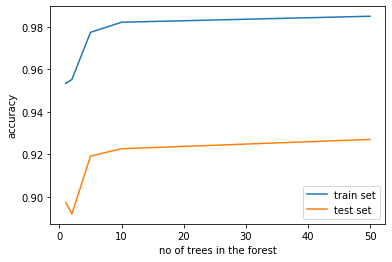

In [29]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
test_accuracy_list=[]
train_accuracy_list=[]
number_of_trees = [1,2,5,10,50]
steps = number_of_trees
for i in number_of_trees:
    # insert your code here
    classifier = RandomForestClassifier(n_jobs = -1 , random_state = random.seed(0), n_estimators = i) 
    
    classifier =  classifier.fit(X_train_counts, train_y)
    
    predictTrainY = classifier.predict(X_train_counts)
    
    predictTestY = classifier.predict(X_test_counts)
    
    train_accuracy = accuracy_score(train_y, predictTrainY)
    
    test_accuracy = accuracy_score(test_y, predictTestY)
    
    test_accuracy_list.append(test_accuracy)
    
    train_accuracy_list.append(train_accuracy) 
    
    
plot_accuracy2(test_accuracy_list ,train_accuracy_list, 'no of trees in the forest', 'accuracy', 'accuracy vs no of trees in ensemble')

with more trees we get better accuracy. However, the rate of improvement decreases as the number of trees increases as at a certain point the benefit in prediction performance from learning more trees will be lower than the cost in computation time for learning these additional trees.More trees provide better estimate of the average  and are closer to ideal tree hence increase. Also overfitting has been minimized due to better closeness to ideal classifier.